In [51]:
# module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [52]:
# Read train data
train = pd.read_csv('./../train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
train.shape

(10886, 12)

In [54]:
# Read test data
test = pd.read_csv('./../test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [55]:
test.shape

(6493, 9)

In [56]:
# Set train feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape)
print(train.info())

(10886, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB
None


In [57]:
# Set test feature
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
print(test.shape)
print(test.info())

(6493, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
year          6493 non-null int64
month         6493 non-null int64
day           6493 non-null int64
hour          6493 non-null int64
minute        6493 non-null int64
second        6493 non-null int64
dayofweek     6493 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 811.7 KB
None


In [58]:
# Distinguish between continuous and categorical features
# Continuous Feature : temp, humidity, windspeed, atemp
# Categorical Feature : season, holiday, workingday, weather, dayofweek, month, year, hour
# Change categorical feature to category
categorical_feature_name = ['season','holiday','workingday','weather','dayofweek','month','year','hour']

for i in categorical_feature_name:
    train[i] = train[i].astype('category')

In [59]:
# Configure required features
feature_name = ['season','weather','temp','atemp','humidity','year','hour','dayofweek','holiday','workingday']

In [60]:
X_train = train[feature_name]
print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [61]:
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [62]:
Y_train = (train['count'])
print(Y_train.shape)
Y_train.head()
    # classified the answers

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [63]:
# n_estimator / n_jobs = -1 do it until you know the answer
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
# Training
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
# Prediction
pre = model.predict(X_test)
print(pre.shape)
pre[0:10]

(6493,)


array([ 10.66,   4.62,   3.75,   4.25,   3.56,   6.82,  41.65, 107.83,
       243.49, 135.29])

[Text(0.5, 1.0, 'Test')]

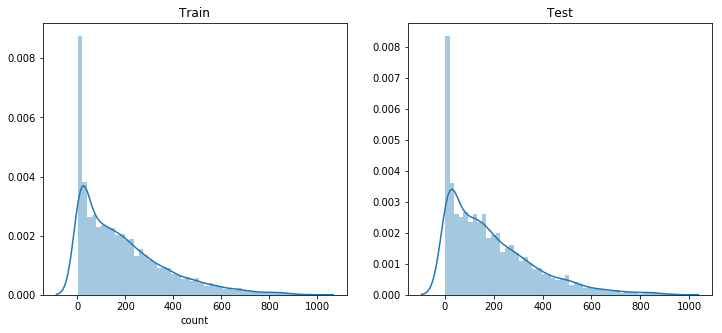

In [66]:
# Visualize predicted data
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train, ax=ax1, bins=50)
ax1.set(title='Train')
sns.distplot(pre, ax=ax2, bins=50)
ax2.set(title='Test')
    # It's okay because the train data and test data look similar

In [67]:
submission = pd.read_csv('./sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [68]:
submission['count'] = pre
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.66
1,2011-01-20 01:00:00,4.62
2,2011-01-20 02:00:00,3.75
3,2011-01-20 03:00:00,4.25
4,2011-01-20 04:00:00,3.56


In [69]:
submission.to_csv('./score-2.csv', index=False)

In [70]:
0.41760

0.4176

In [71]:
417/3251

0.12826822516148878

- Remove windspeed from feature 
- Change Categorical Feature to Category
- feature_name = ['season','weather','temp','atemp','humidity','year','hour','dayofweek','holiday','workingday']
- RandomForestRegressor prediction
- Top 12.7%